1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 
import seaborn as sns
%matplotlib inline
from scipy import linalg as la

In [ ]:
# Generate a dataset simulating 3 features, each with N entries (N being  O(1000) ). Each feature is made by random numbers generated according the normal distribution  N(μ,σ)  with mean  μi  and standard deviation  σi , with  i=1,2,3 . Generate the 3 variables  xi  such that:
N, mean, std = 2000, 0 , [1,3]
# x1  is distributed as  N(0,1) 
x1 = np.random.normal(loc = mean ,scale = std[0], size = N)
# x2  is distributed as  x1+N(0,3) 
x2 = x1 + np.random.normal(loc = mean ,scale = std[1], size = N)
# x3  is given by  2x1+x2 
x3 = 2*x1 + x2

print('1) Dataset simulating 3 features x1, x2, x3\n')
data = pd.DataFrame({'x1': x1, 'x2':x2,'x3': x3})
data.head()

1) Dataset simulating 3 features x1, x2, x3



,x1,x2,x3
0,0.194919,-1.996649,-1.606810
1,1.040161,-0.005248,2.075074
2,0.836712,-3.143781,-1.470357
3,-0.370224,0.719174,-0.021275
4,-0.792610,-4.703579,-6.288798


In [ ]:
# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_matrix = np.cov(data.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print('-'*100 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n')
print("Eigenvalues :\n", eigen_vals)
print("Eigenvectors as columns :\n",eigen_vecs )

----------------------------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

Eigenvalues :
 [2.76780851e+01 1.72764951e-15 2.04409838e+00]
Eigenvectors as columns :
 [[-0.11622296 -0.81649658  0.56553122]
 [-0.57640849 -0.40824829 -0.70787469]
 [-0.80885442  0.40824829  0.42318774]]


In [ ]:
# Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
U, spectrum, Vt = np.linalg.svd(data.T)
eigen_vals_svd, eigen_vecs_svd = spectrum**2/(N-1), U

# Swaping the colums so I can compare the two methods
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]

print('-'*100 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)
print("Eigenvectors as columns :\n",eigen_vecs_svd)

print("\nAre the two procedures yield the same Eigenvalues ?", np.allclose(eigen_vals, eigen_vals_svd, rtol=1e-03))
print("Are the two procedures yield the same Eigenvectors ?", np.allclose(eigen_vecs, eigen_vecs_svd, rtol=1e-03))

----------------------------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [2.76806766e+01 3.65587746e-30 2.04416919e+00]
Eigenvectors as columns :
 [[-0.11623241 -0.81649658  0.56552927]
 [-0.57639666 -0.40824829 -0.70788433]
 [-0.80886149  0.40824829  0.42317422]]

Are the two procedures yield the same Eigenvalues ? True
Are the two procedures yield the same Eigenvectors ? True


```np.linalg.eig()``` may not be identical to the eigenvalues obtained from the s attribute of the output of np.linalg.svd().

This is because ```np.linalg.eig() ```returns the eigenvalues and eigenvectors of the input matrix, whereas ```np.linalg.svd()``` returns the singular values and matrices that can be used to reconstruct the original matrix. The eigenvalues obtained from ```np.linalg.eig()``` will be the eigenvalues of the matrix, whereas the eigenvalues obtained from ```np.linalg.svd()``` will be the square roots of the eigenvalues of the matrix.

Also, ```np.linalg.eig()``` only works for square matrices, and it's only guaranteed to work for normal matrices (matrices that commute with their adjoints) and it fails for the non-normal matrices. Whereas SVD works for any matrix, even if it's not square.

In [ ]:
# What percent of the total dataset's variability is explained by the principal components? 

print('-'*100 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(eigen_vals)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability\n" % (Lambda[2, 2]/Lambda.trace()))

# Given how the dataset was constructed, do these make sense? 

print('PCA reduce dimension by:')
print('   1. Taking linear combinations of the original variables.')
print('   2. Each linear combination explains the most variance in the data it can.')
print('   3. Each linear combination is uncorrelated with the other\n')
print('---> In our case, it makes sense because the 3 features are correlated ')
print('also the third column is just a linear combination of the first two features \nwhich make sense that variance is explained by just two principal components.')
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print('\nPercentage variability of the reduced system: %.2f%%' %(np.sum(Lambda[[0,1]])/Lambda.trace()))


----------------------------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Lambda:
 [[2.76780851e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.72764951e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.04409838e+00]] 

Trace(A):
 29.72218343692967 

Trace(Lambda):
 29.72218343692966 

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 0.07% of the total variability

PCA reduce dimension by:
   1. Taking linear combinations of the original variables.
   2. Each linear combination explains the most variance in the data it can.
   3. Each linear combination is uncorrelated with the other

---> In our case, it makes sense because the 3 features are correlated 
also the third column is just a linear combination of the first two features 
wh

In [ ]:
# Redefine the data according to the new basis from the PCA
print('-'*80 + '\n5) The data redefined according to the new basis from the PCA\n')
data_new = pd.DataFrame(np.dot(eigen_vecs.T, data.T).T, columns=['x1','x2','x3'])
print(data_new.head())

--------------------------------------------------------------------------------
5) The data redefined according to the new basis from the PCA

         x1            x2        x3
0  2.427907 -4.882880e-16  0.843628
1 -1.796298 -1.560879e-15  1.470104
2  2.904162 -1.573947e-15  2.076353
3 -0.354301  6.273982e-16 -0.727461
4  7.890025  6.551026e-16  0.219957


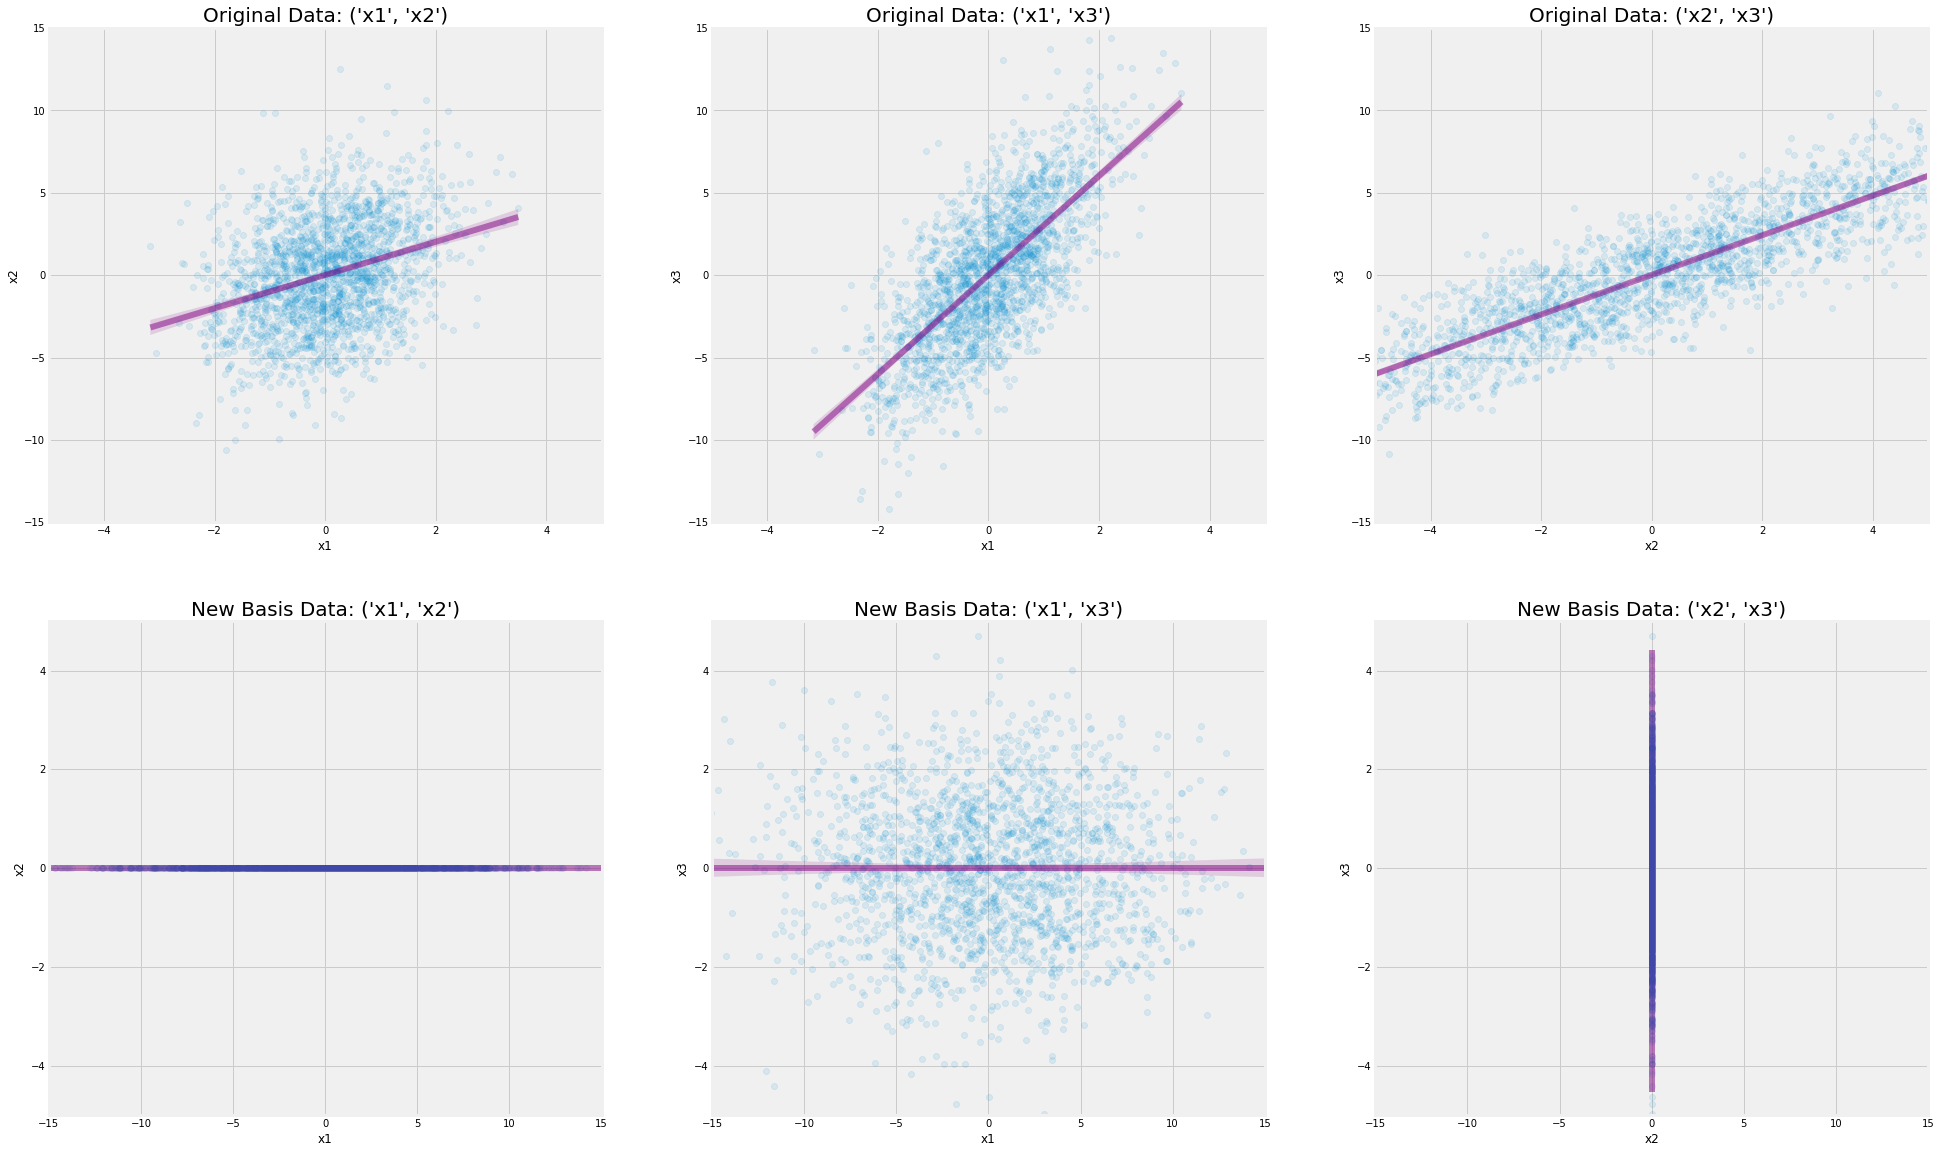

In [ ]:
# Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the  [x0,x1] ,  [x0,x2]  and  [x1,x2]  projections) of scatter plots.

fig, axes = plt.subplots(2,3,figsize=(30,20))
  
col = [('x1','x2'), ('x1','x3'),('x2','x3')]
for i in range(3):
  sns.regplot(data = data, x =col[i][0], y = col[i][1], ax = axes[0,i], line_kws={"color": "purple", 'alpha':0.5}, scatter_kws={'alpha':0.1})
  axes[0,i].set_title("Original Data: " + str(col[i]), fontsize=20)
  axes[0,i].axis([-5,5,-15,15])
  sns.regplot(data = data_new, x =col[i][0], y = col[i][1], ax = axes[1,i], line_kws={"color": "purple", 'alpha':0.5}, scatter_kws={'alpha':0.1})
  axes[1,i].set_title("New Basis Data: " + str(col[i]), fontsize=20)
  axes[1,i].axis([-15,15,-5,5])

After applying PCA to the data, the transformed data will be represented in a new coordinate system, where the principal components are the new axes.

* the scatter plot shows us the structure of the data in a more interpretable way, as it allows us to visualize how the different samples are distributed with respect to the new principal components.

* In our case, the first principal component is the one that captures the most variance in the data, and it's in the direction of the largest spread in the data (1st plot). While the second principal component is orthogonal to the first one and it captures the second most variance in the data (3rd plot).

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [ ]:
nData = data.copy()
noise = np.random.normal(loc = mean, scale=1/20, size=(N,10,3)).sum(axis=1)
nData += noise
nData.head()

,x1,x2,x3
0,0.323648,-1.692078,-1.917712
1,0.787318,-0.024936,2.242761
2,0.874999,-3.185686,-1.342277
3,-0.365167,0.381441,0.015966
4,-0.966828,-4.815464,-6.288541


In [ ]:
nCov_matrix = np.cov(nData.T)
eigen_vals, eigen_vecs = np.linalg.eig(nCov_matrix)

print('-'*80 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n')
print("Eigenvalues :\n", eigen_vals)
print("Eigenvectors as columns :\n",eigen_vecs )


U, spectrum, Vt = np.linalg.svd(nData.T)
eigen_vals_svd, eigen_vecs_svd = spectrum.copy()**2/(N - 1), U.copy()

# Swaping the colums so I can compare the two methods
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]

print('-'*100 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)
print("Eigenvectors as columns :\n",eigen_vecs_svd)

--------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

Eigenvalues :
 [2.77027478e+01 2.51791010e-02 2.08119797e+00]
Eigenvectors as columns :
 [[-0.11545617 -0.8195874   0.56120083]
 [-0.57590792 -0.40509529 -0.71009004]
 [-0.80932067  0.40518428  0.42523612]]
----------------------------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [2.77055416e+01 2.51792942e-02 2.08127774e+00]
Eigenvectors as columns :
 [[-0.11546583 -0.81958857  0.56119714]
 [-0.5758945  -0.40509442 -0.71010143]
 [-0.80932884  0.40518279  0.42522198]]


In [ ]:
# What percent of the total dataset's variability is explained by the principal components? 

print('-'*100 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(spectrum)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", nCov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability\n" % (Lambda[2, 2]/Lambda.trace()))

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print('\nPercentage variability of the reduced system: %.5f%%' %(np.sum(Lambda[[0,1]])/Lambda.trace()))

----------------------------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Lambda:
 [[235.33673244   0.           0.        ]
 [  0.          64.50173796   0.        ]
 [  0.           0.           7.09460423]] 

Trace(A):
 29.809124847770377 

Trace(Lambda):
 306.9330746300484 

By selecting the component 0, we retain 0.77% of the total variability
By selecting the component 1, we retain 0.21% of the total variability
By selecting the component 2, we retain 0.02% of the total variability


Percentage variability of the reduced system: 0.97689%


PCA is a linear technique, it is sensitive to the noise, as it projects the data onto a new coordinate system based on the covariance matrix of the data. The noise will add random variation to the covariance matrix, which can affect the calculation of the principal components and the amount of variance they explain.

The principal components will still be the directions of maximum variance, but the amount of variance explained by each principal component will be affected by the noise. As a result, the transformed data may be more spread out or more clustered than expected.

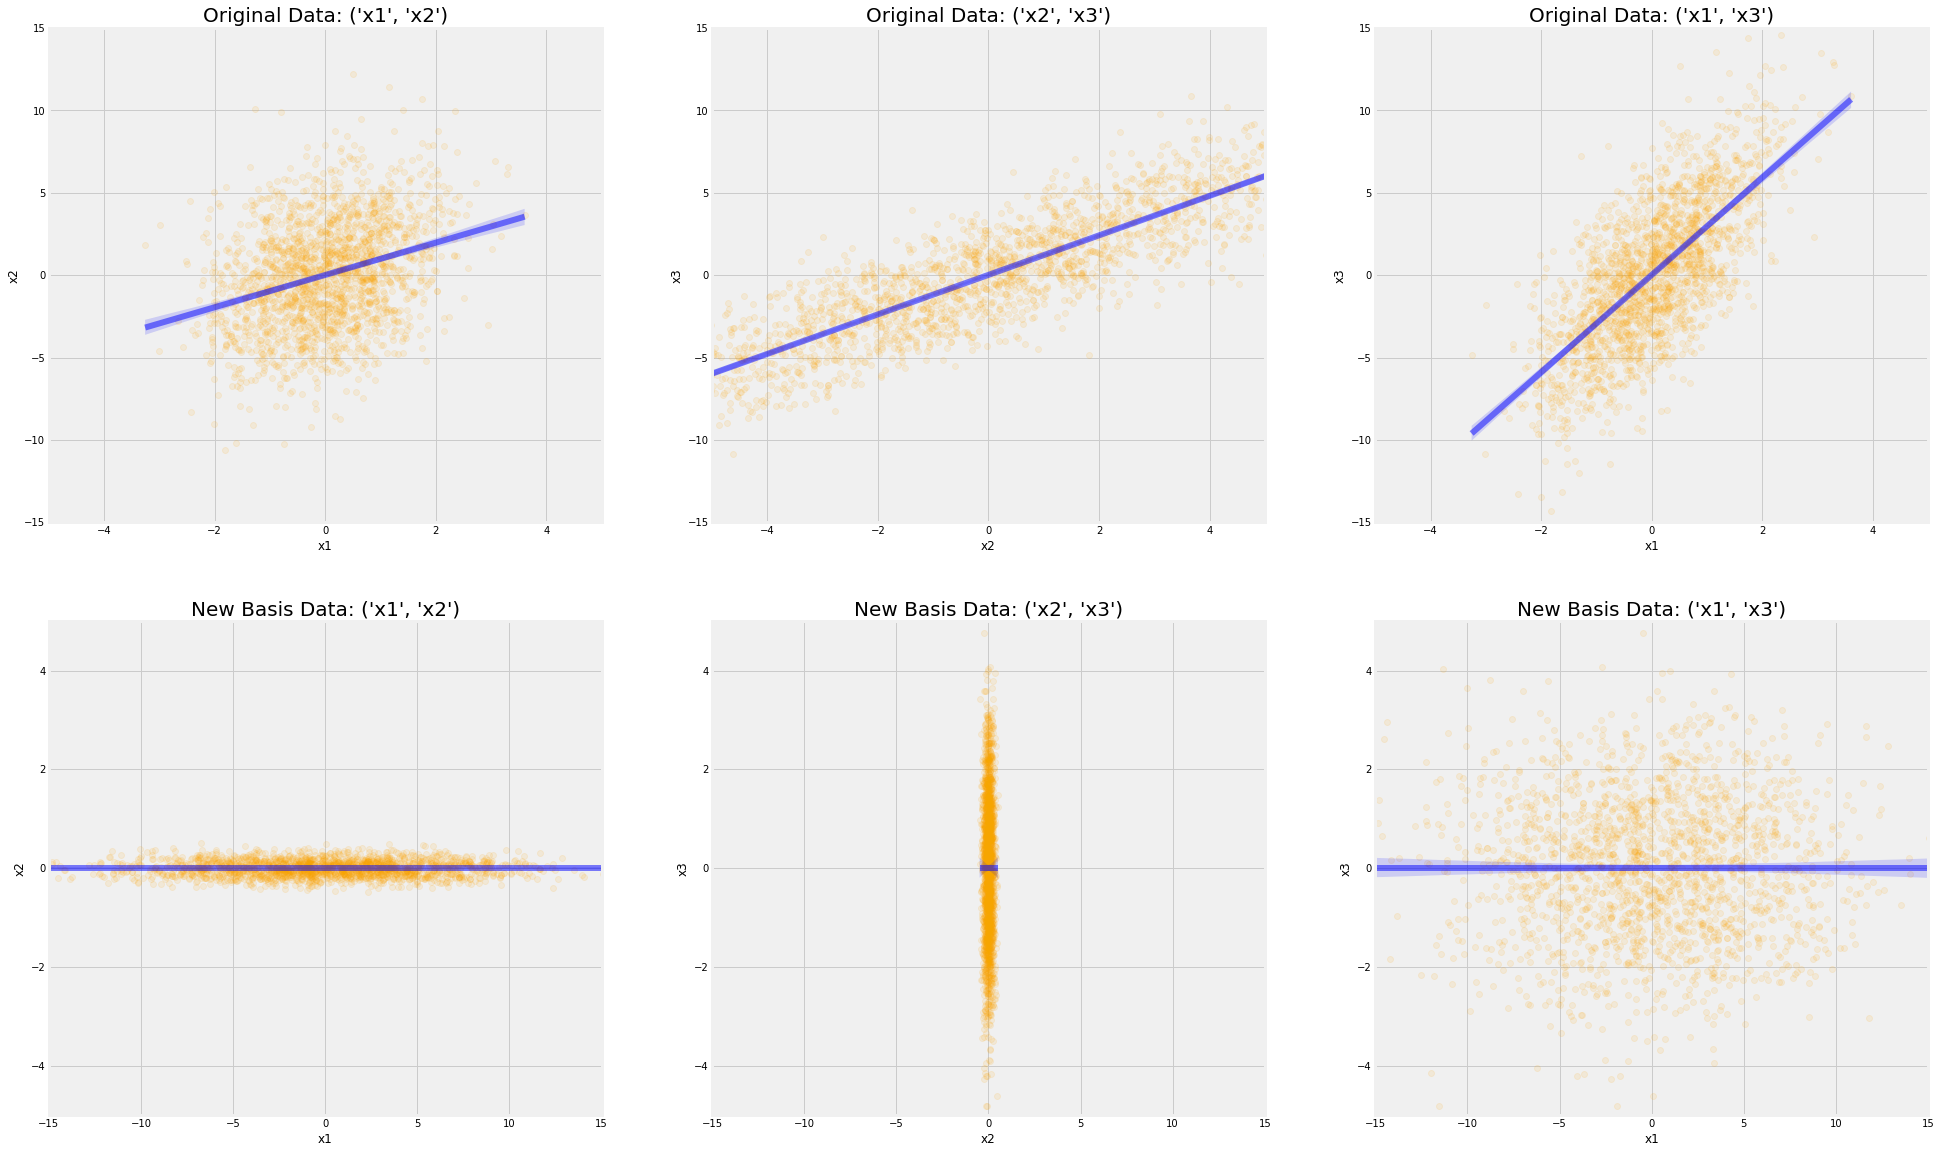

In [ ]:
# Redefine the data according to the new basis from the PCA
nData_new = pd.DataFrame(np.dot(eigen_vecs.T, nData.T).T, columns=['x1','x2','x3'])
fig, axes = plt.subplots(2,3,figsize=(30,20))
  
col = [('x1','x2'),('x2','x3'), ('x1','x3')]
for i in range(3):
  sns.regplot(data = nData, x =col[i][0], y = col[i][1], ax = axes[0,i], line_kws={"color": "blue", 'alpha':0.5}, scatter_kws={'alpha':0.1, "color": "orange"})
  axes[0,i].set_title("Original Data: " + str(col[i]), fontsize=20)
  axes[0,i].axis([-5,5,-15,15])
  sns.regplot(data = nData_new, x =col[i][0], y = col[i][1], ax = axes[1,i], line_kws={"color": "blue", 'alpha':0.5}, scatter_kws={'alpha':0.1, "color": "orange"})
  axes[1,i].set_title("New Basis Data: " + str(col[i]), fontsize=20)
  axes[1,i].axis([-15,15,-5,5])

adding uncorrelated random noise did not have a significant effect on the resulting principal components. This is because PCA operates by finding the directions of maximum variance in the data, and the presence of uncorrelated noise will not affect the overall patterns or relationships in the correlated features. However, the noise may increase the overall variance of the dataset, which could lead to the principal components having slightly higher eigenvalues, but the overall structure of the principal components will remain the same.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-16 18:27:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data.3’

magic04.data.3      100%[===================>]   1.41M  3.20MB/s    in 0.4s    

2023-01-16 18:27:48 (3.20 MB/s) - ‘data/magic04.data.3’ saved [1477391/1477391]

--2023-01-16 18:27:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names.3’

magic04.names.3     100%[===================>]   5.27K 

In [ ]:
!cat /content/data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [ ]:
file_name="/content/data/magic04.data"
data=pd.read_csv(file_name,nrows=2000)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym', 'fM3Long','fM3Trans','fAlpha','fDist','class']
data.drop(columns=['class'], inplace=True)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098


In [ ]:
Cov_matrix = np.cov(data.T)
eigen_vals, eigen_vecs = np.linalg.eig(Cov_matrix)

print('-'*80 +'\n2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n')
print("Eigenvalues :\n", eigen_vals)
# print("Eigenvectors as columns :\n",eigen_vecs )


U, spectrum, Vt = np.linalg.svd(data)
eigen_vals_svd, eigen_vecs_svd = spectrum**2/(2000 -1), U

# Swaping the colums so I can compare the two methods
eigen_vals_svd[[1,2]] = eigen_vals_svd[[2,1]]
eigen_vecs_svd[:, [1,2]] = eigen_vecs_svd[:, [2,1]]

print('-'*80 +'\n3) Eigenvectors and eigenvalues using SVD\n')
print("Eigenvalues :\n", eigen_vals_svd)
# print("Eigenvectors as columns :\n",eigen_vecs_svd)

--------------------------------------------------------------------------------
2) Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

Eigenvalues :
 [5.49211180e+03 1.69646706e+03 9.68123830e+02 3.69494393e+02
 2.40239882e+02 1.80354696e+02 3.59792244e+01 4.30203538e-02
 8.72735821e-03 3.28661765e-04]
--------------------------------------------------------------------------------
3) Eigenvectors and eigenvalues using SVD

Eigenvalues :
 [4.41128028e+04 1.11012283e+03 1.71552146e+03 5.27239784e+02
 2.71582368e+02 1.80750945e+02 3.86616566e+01 3.27317151e-01
 1.98855741e-02 3.68536222e-04]


In [ ]:
# What percent of the total dataset's variability is explained by the principal components? 

print('-'*80 + '\n4) percent of the total dataset variability is explained by the principal components\n')
Lambda = np.diag(eigen_vals)
print("Trace(A):\n", Cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

for i in range(len(Lambda)):
  print("By selecting the component" ,i, " we retain %.2f%% of the total variability" % (Lambda[i, i]/Lambda.trace()))

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print('\nPercentage variability of the reduced system: %.2f%% , Explained by 6 Features' %(np.sum(Lambda[[0,1,2,3,5]])/Lambda.trace()))

--------------------------------------------------------------------------------
4) percent of the total dataset variability is explained by the principal components

Trace(A):
 8982.822963041537 

Trace(Lambda):
 8982.822963041546 

By selecting the component 0  we retain 0.61% of the total variability
By selecting the component 1  we retain 0.19% of the total variability
By selecting the component 2  we retain 0.11% of the total variability
By selecting the component 3  we retain 0.04% of the total variability
By selecting the component 4  we retain 0.03% of the total variability
By selecting the component 5  we retain 0.02% of the total variability
By selecting the component 6  we retain 0.00% of the total variability
By selecting the component 7  we retain 0.00% of the total variability
By selecting the component 8  we retain 0.00% of the total variability
By selecting the component 9  we retain 0.00% of the total variability

Percentage variability of the reduced system: 0.97% , E

In [ ]:
data_new = pd.DataFrame(np.dot(eigen_vecs.T, data.T).T, columns=data.columns)
data_new.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'], inplace=True)
data_cl = data.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'])
data_new.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym
0,-200.149211,-35.595827,-45.435610,-32.836324,-9.902071,9.539938
1,-250.079463,-91.891242,-120.388601,-19.040830,-210.640203,15.975173
2,-109.367868,-22.614280,-44.891588,-16.146899,-21.348554,4.652545
3,-358.076989,-13.967886,-58.507401,-41.585829,-26.901857,-24.575716
4,-236.965834,-68.457916,-43.949929,-33.705274,-16.923328,-11.618805


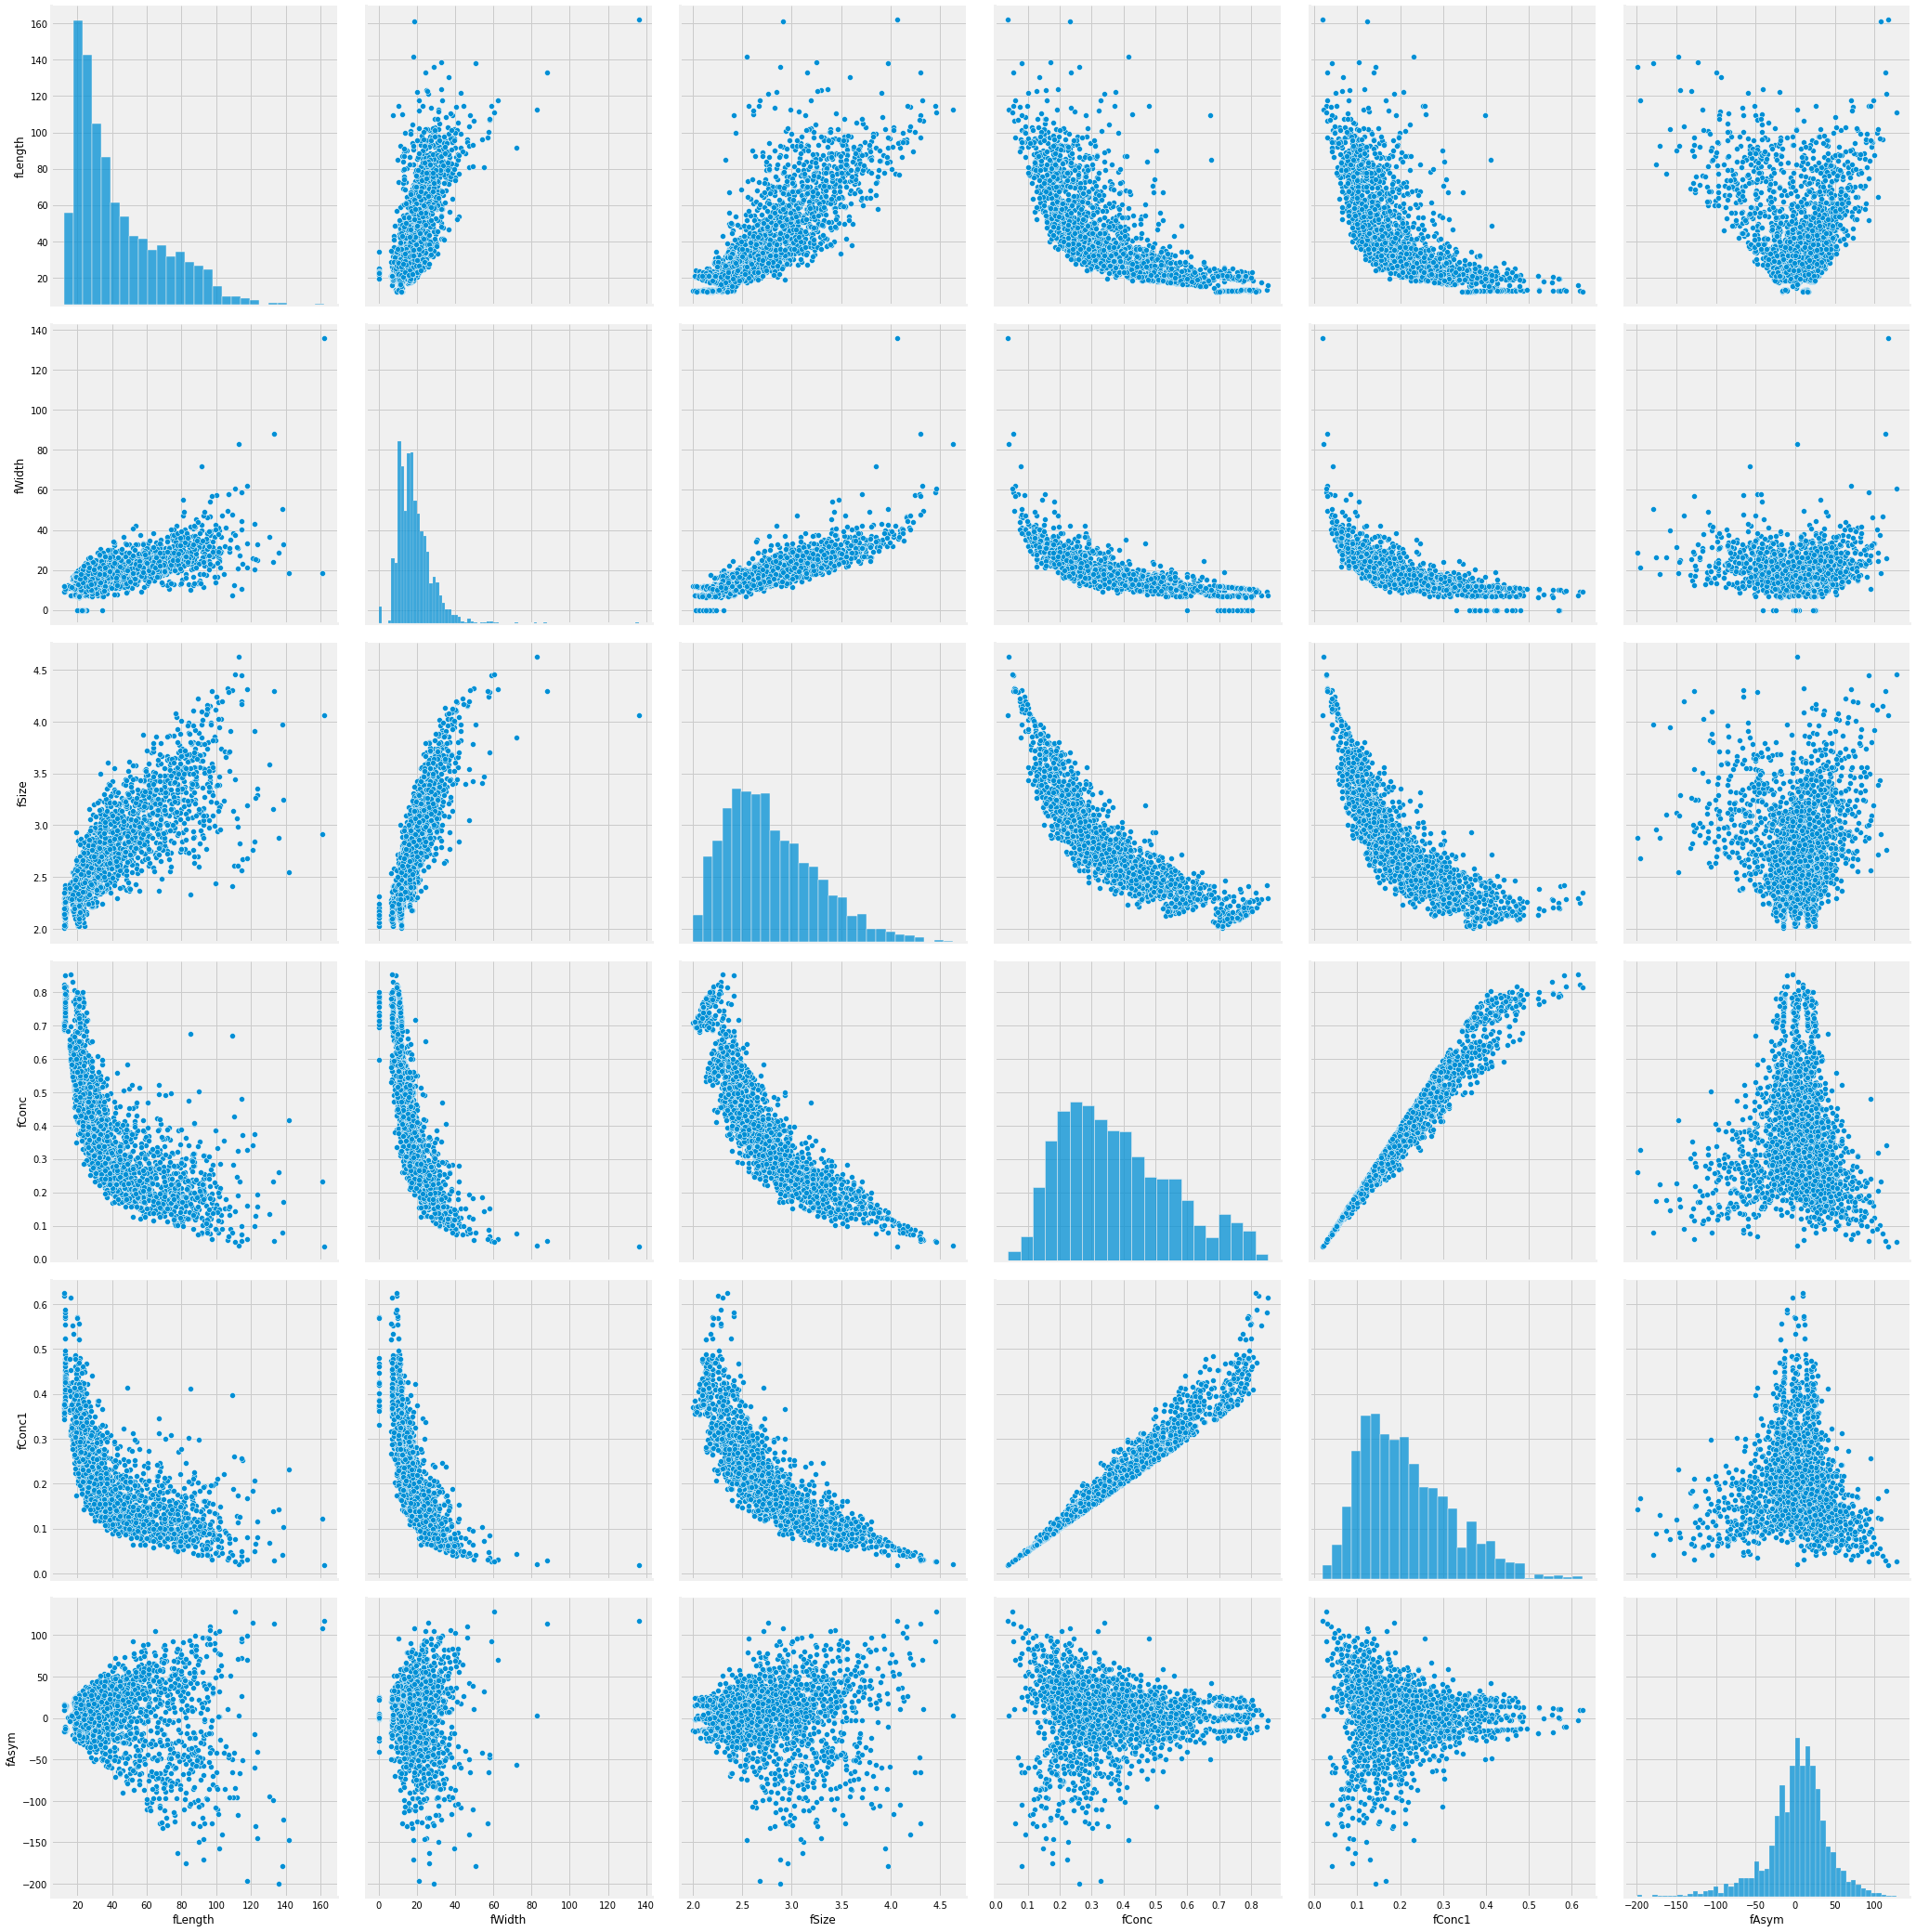

In [ ]:
g = sns.pairplot(data_cl)
g.fig.set_figwidth(30)
g.fig.set_figheight(30)

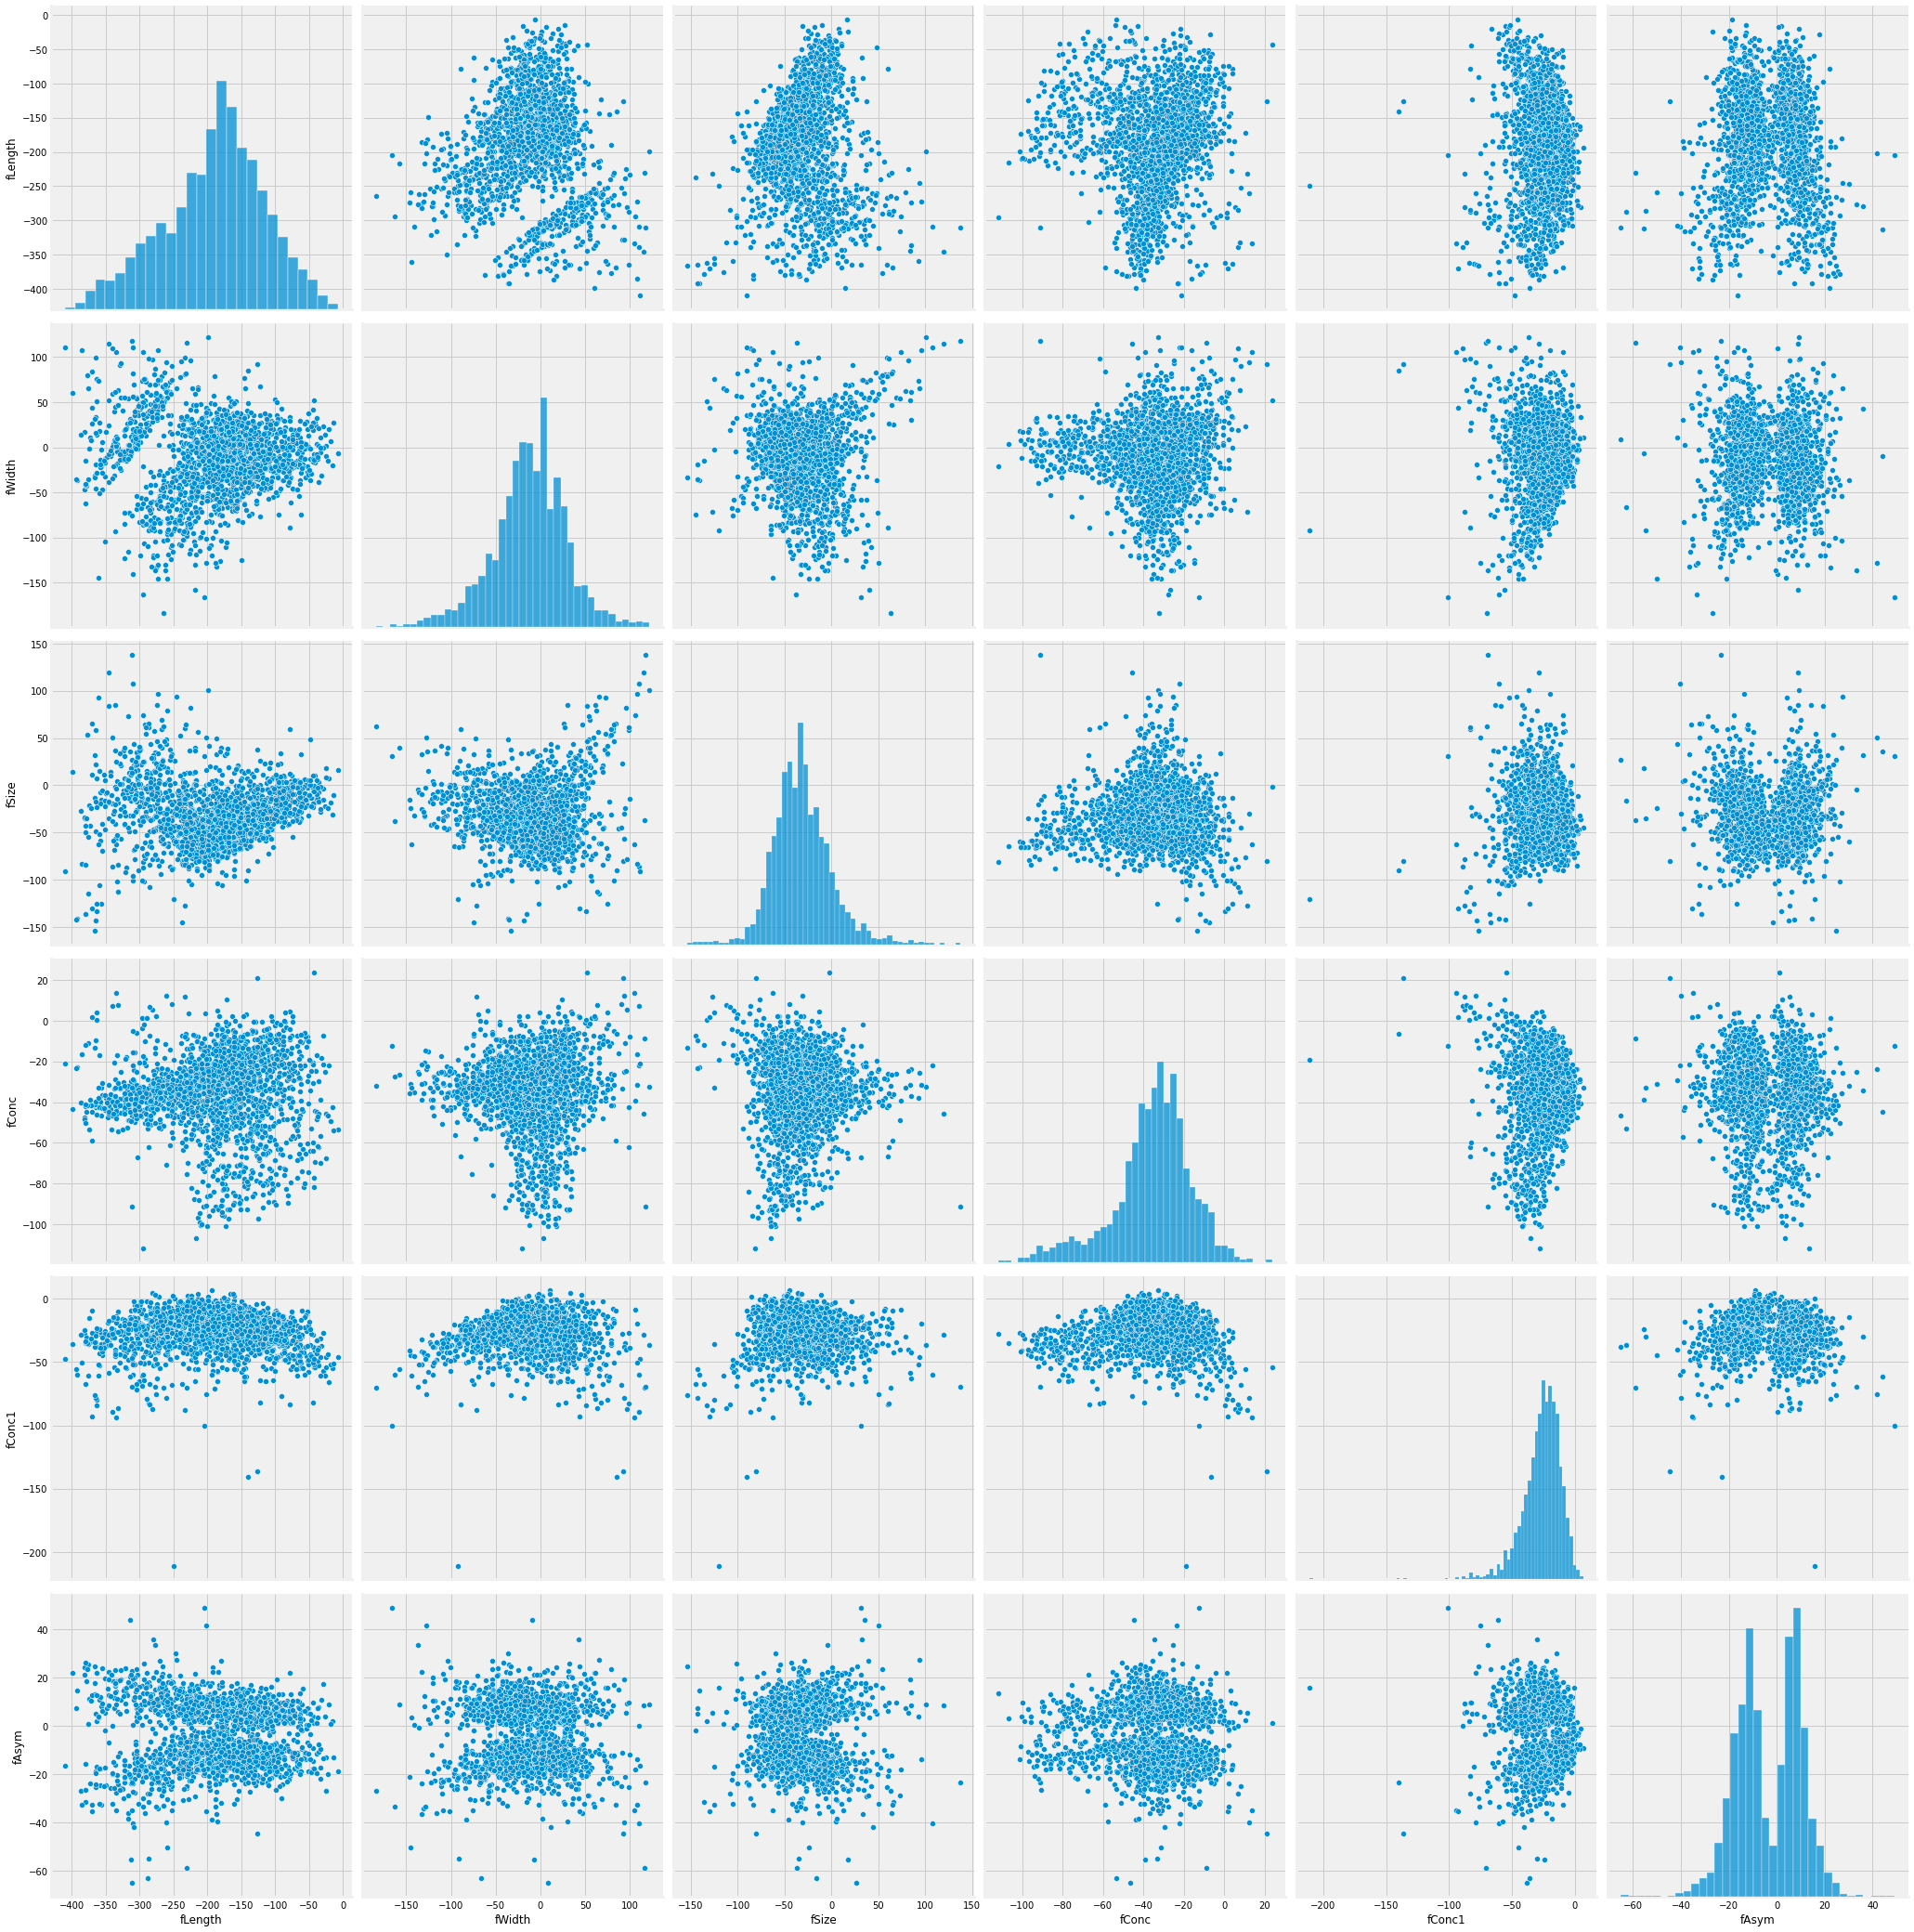

In [ ]:
g = sns.pairplot(data_new)
g.fig.set_figwidth(30)
g.fig.set_figheight(30)

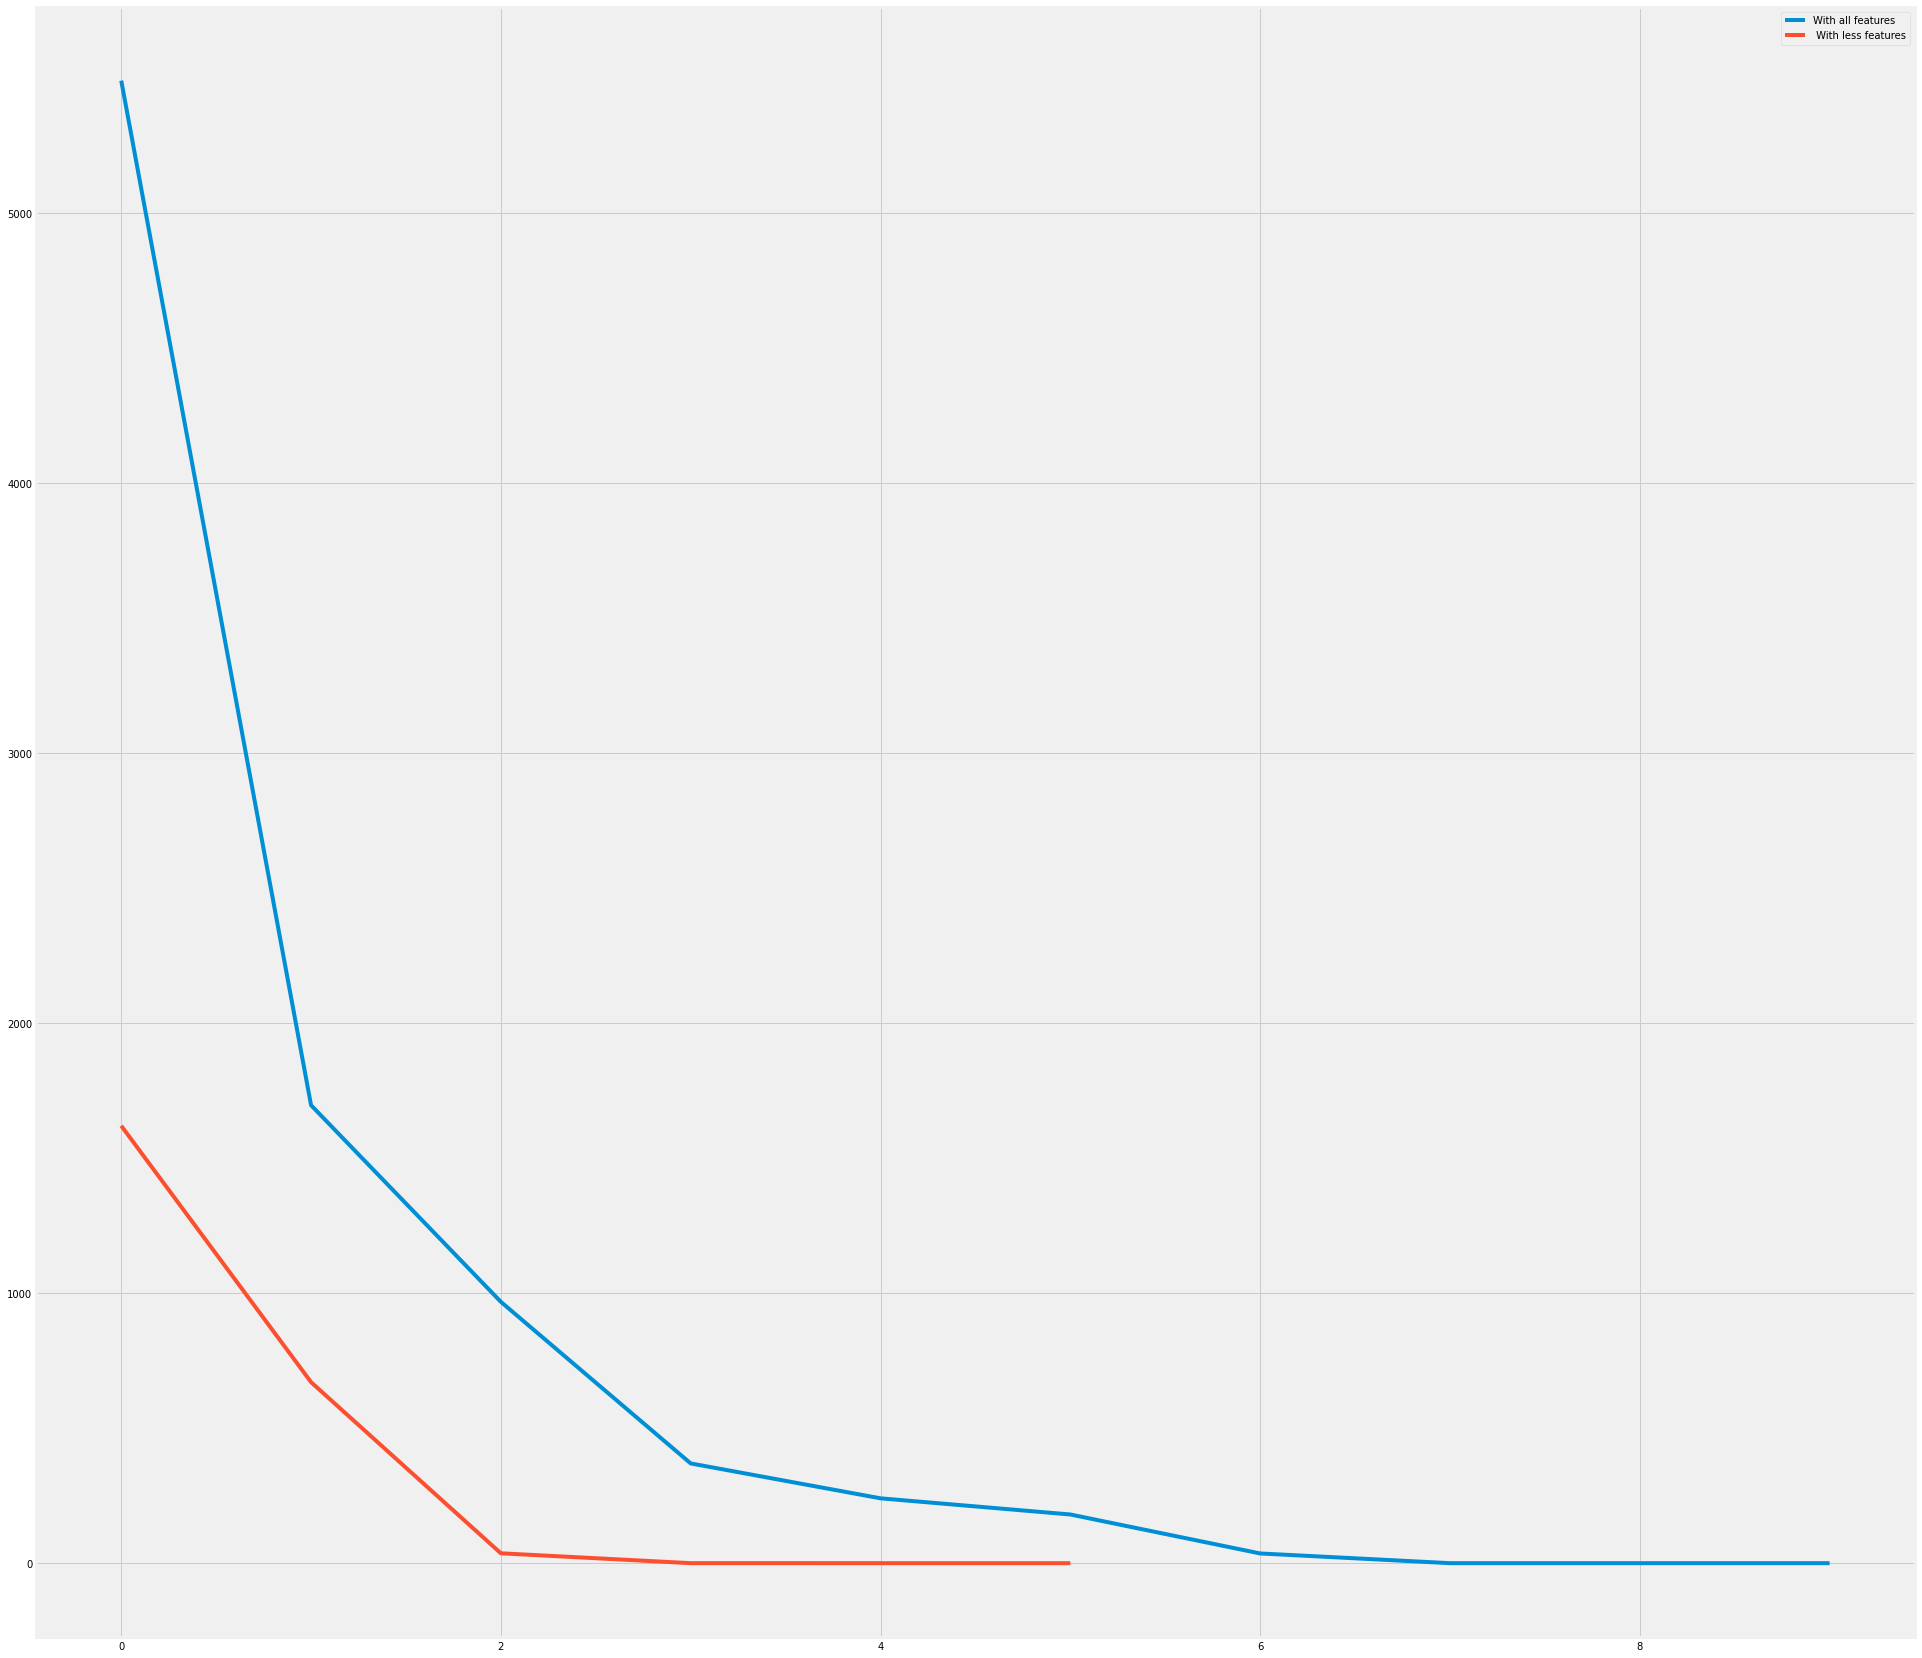

In [ ]:
plt.figure(figsize=(30,30))

for x in [data, data_cl ]:
  X = x.values.T
  l, V = np.linalg.eig(np.cov(X))
  plt.plot(l)
  plt.legend(['With all features', ' With less features'])

the eigenvalue with the largest value corresponds to the eigenvector that explains the most amount of variability in the data. The larger the gap between the largest eigenvalue and the second largest eigenvalue, the more the first eigenvector explains the variability in the data.